In [1]:
from livelossplot import PlotLosses

from ogb.nodeproppred import Evaluator
import data_utils
import model_utils
from tqdm import tqdm
import torch as ch
import torch.nn.functional as F
import argparse

Using backend: pytorch


In [2]:
%load_ext autotime

time: 339 µs (started: 2021-03-17 21:36:37 -04:00)


In [7]:
def train_model(ds, model, evaluator, epochs, lr):
    train_idx, test_idx = ds.get_idx_split()
    liveloss = PlotLosses()

    optimizer = ch.optim.Adam(
        model.parameters(), lr=lr, weight_decay=5e-4)
    loss_fn = ch.nn.CrossEntropyLoss().cuda()
    iterator = range(1, 1 + epochs)
        
    for epoch in iterator:
        loss = model_utils.train(model, ds, train_idx, optimizer, loss_fn)
        train_acc, test_acc = model_utils.test(
            model, ds, train_idx, test_idx, evaluator)
        
        # At this stage, model in eval mode
        with ch.no_grad():
            out = model(ds.get_features())[test_idx]
            val_loss = loss_fn(out, ds.get_labels().squeeze(1)[test_idx])
            val_loss = val_loss.item()
        # train() will switch it to train mode
        # so need not worry about changing modes

        logs = {
            "loss": loss,
            "val_loss": val_loss,
            "acc": train_acc,
            "val_acc": test_acc,
        }
            
        # Plot losses live
        liveloss.update(logs)
        liveloss.send()

time: 3.51 ms (started: 2021-03-17 21:41:01 -04:00)


In [4]:
# Define graph
ds = data_utils.ArxivNodeDataset("adv")

# Modify graph
ds.change_mean_degree(10)

100%|██████████| 169343/169343 [00:30<00:00, 5548.39it/s]


time: 2min 13s (started: 2021-03-17 21:36:37 -04:00)


In [ ]:
# Define model
hidden_channels = 256
num_layers = 3
dropout = 0.5
epochs = 500
lr = 5e-2

model = model_utils.GCN(ds, hidden_channels, num_layers, dropout)
model = model.cuda()
evaluator = Evaluator(name='ogbn-arxiv')

# Train model, log metrics
train_model(ds, model, evaluator, epochs, lr)

In [ ]:
# Define model
hidden_channels = 256
num_layers = 3
dropout = 0.5
epochs = 500
lr = 2e-2

model = model_utils.GCN(ds, hidden_channels, num_layers, dropout)
model = model.cuda()
evaluator = Evaluator(name='ogbn-arxiv')

# Train model, log metrics
train_model(ds, model, evaluator, epochs, lr)

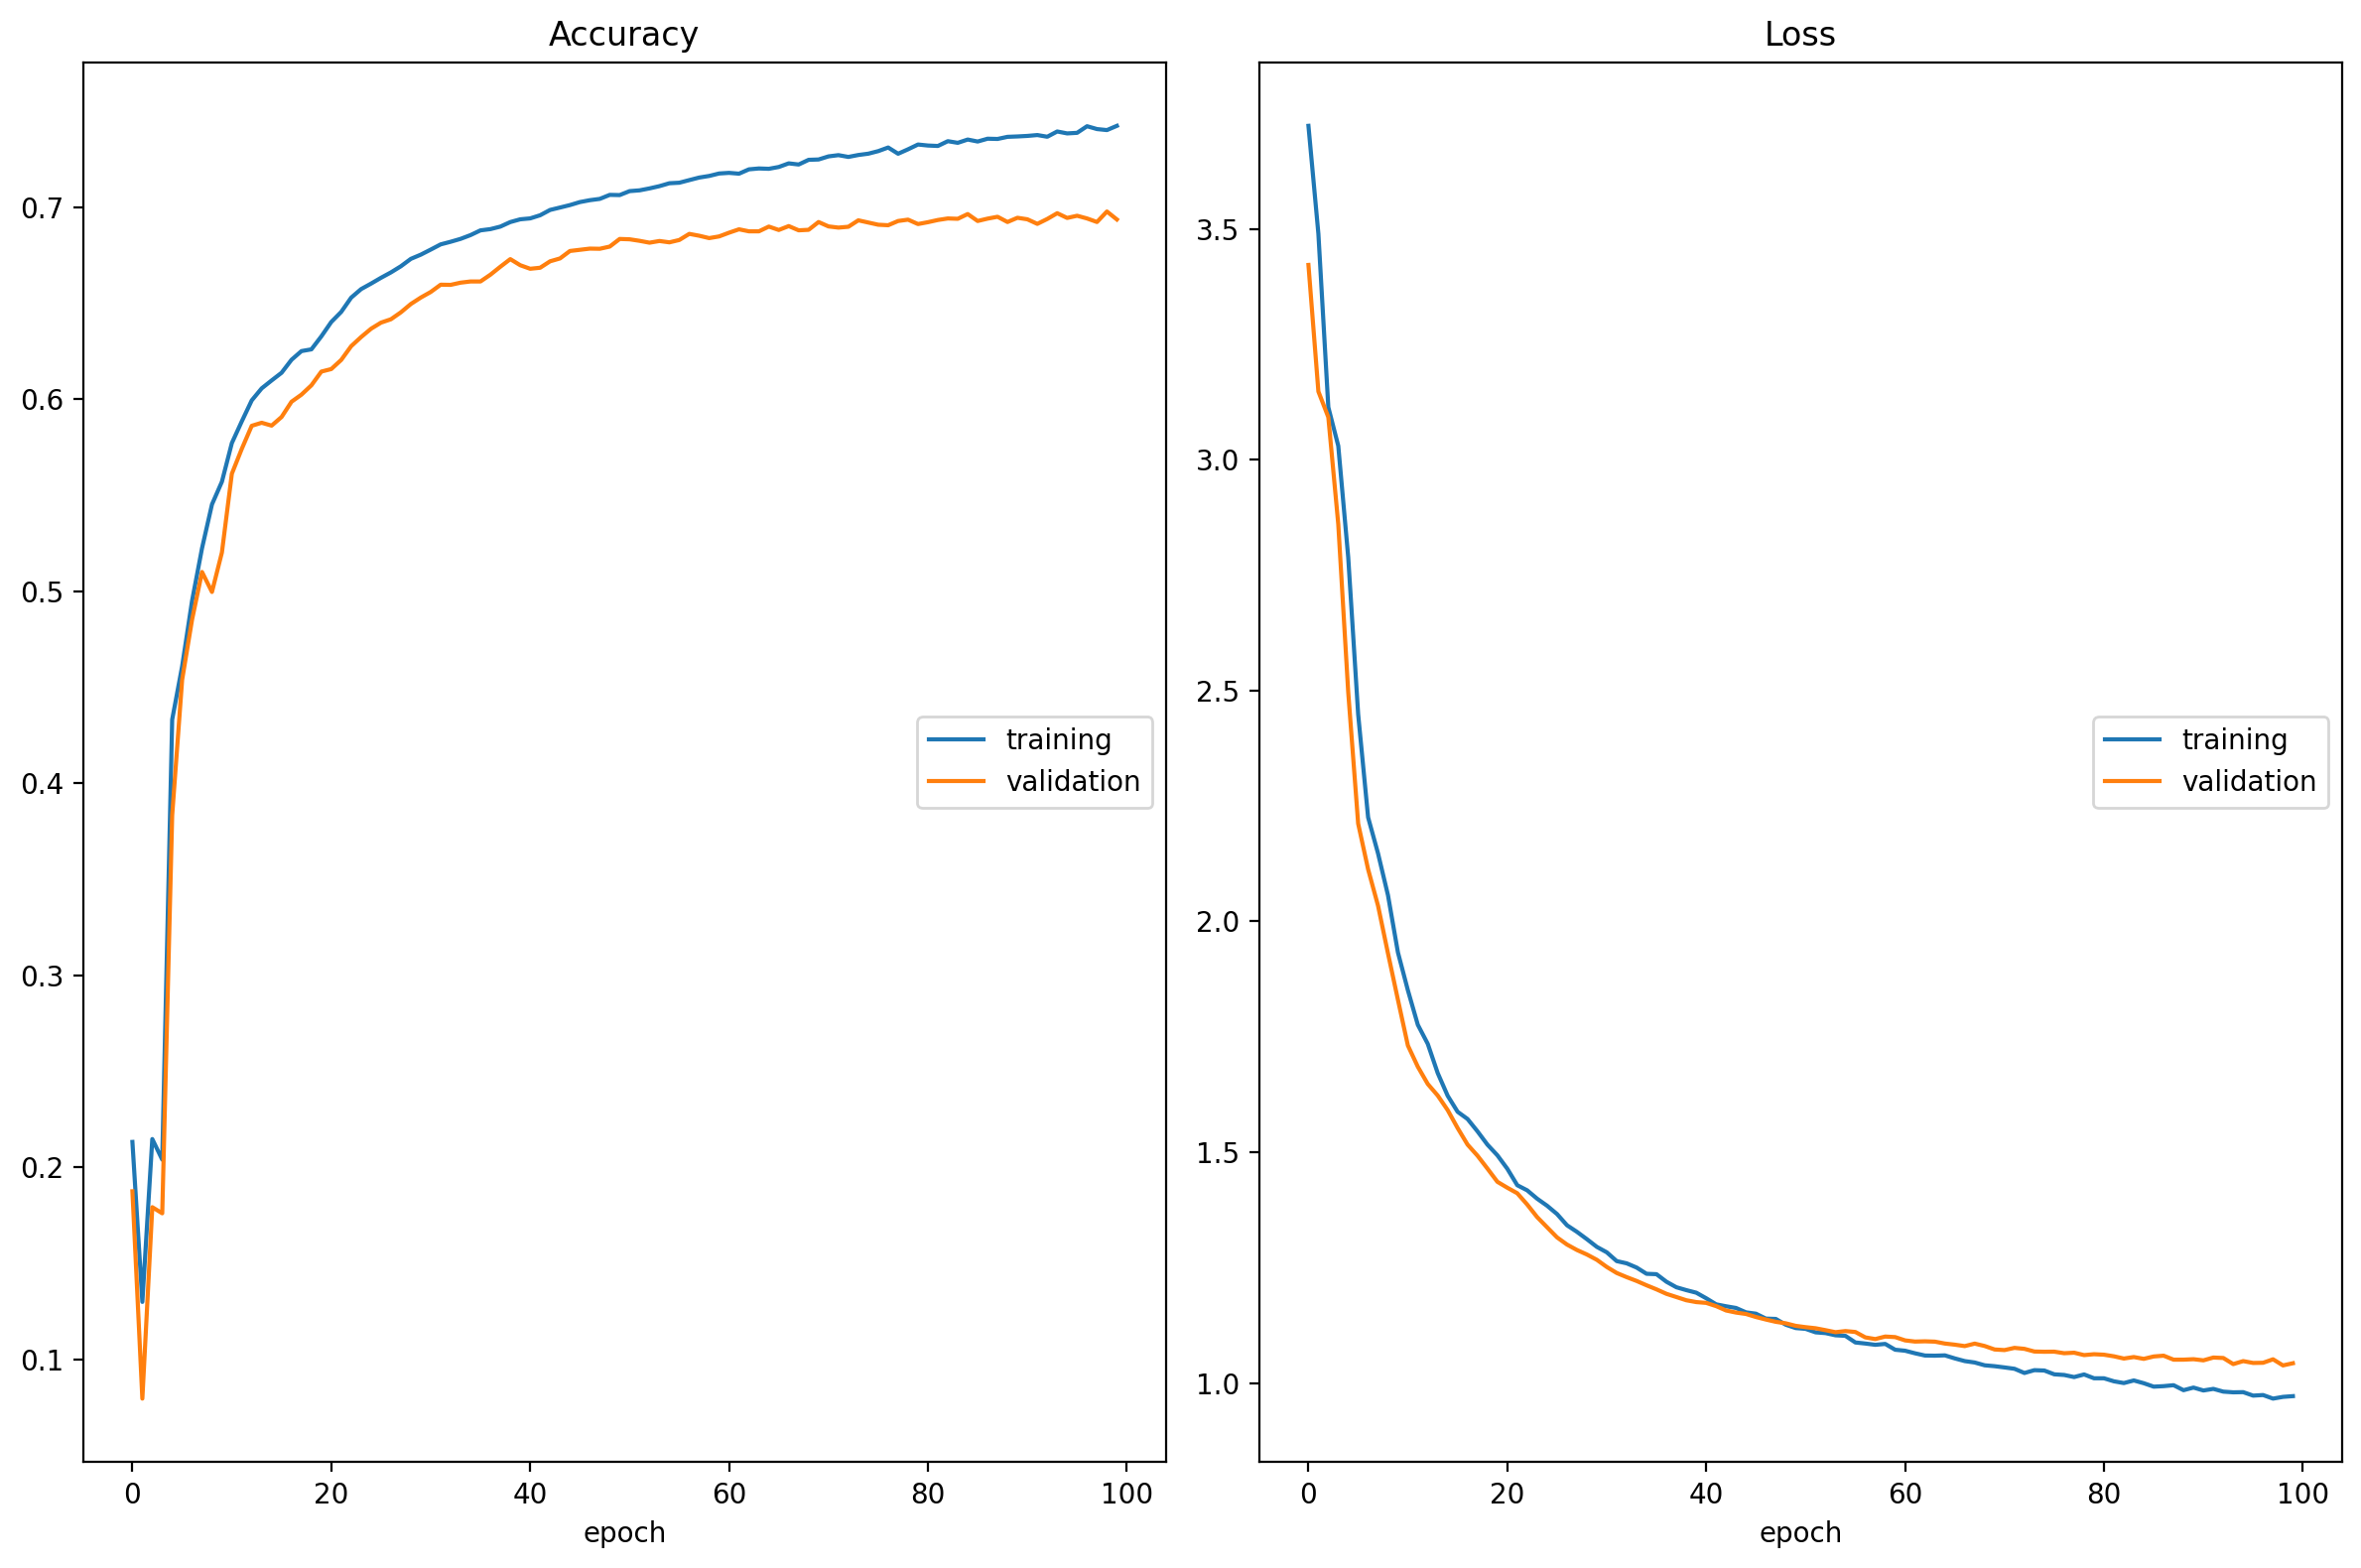

Accuracy
	training         	 (min:    0.130, max:    0.742, cur:    0.742)
	validation       	 (min:    0.080, max:    0.698, cur:    0.694)
Loss
	training         	 (min:    0.966, max:    3.723, cur:    0.971)
	validation       	 (min:    1.038, max:    3.422, cur:    1.043)
time: 1min 34s (started: 2021-03-17 21:44:56 -04:00)


In [9]:
# Define model
hidden_channels = 256
num_layers = 3
dropout = 0.5
epochs = 100
lr = 1e-2

model = model_utils.GCN(ds, hidden_channels, num_layers, dropout)
model = model.cuda()
evaluator = Evaluator(name='ogbn-arxiv')

# Train model, log metrics
train_model(ds, model, evaluator, epochs, lr)

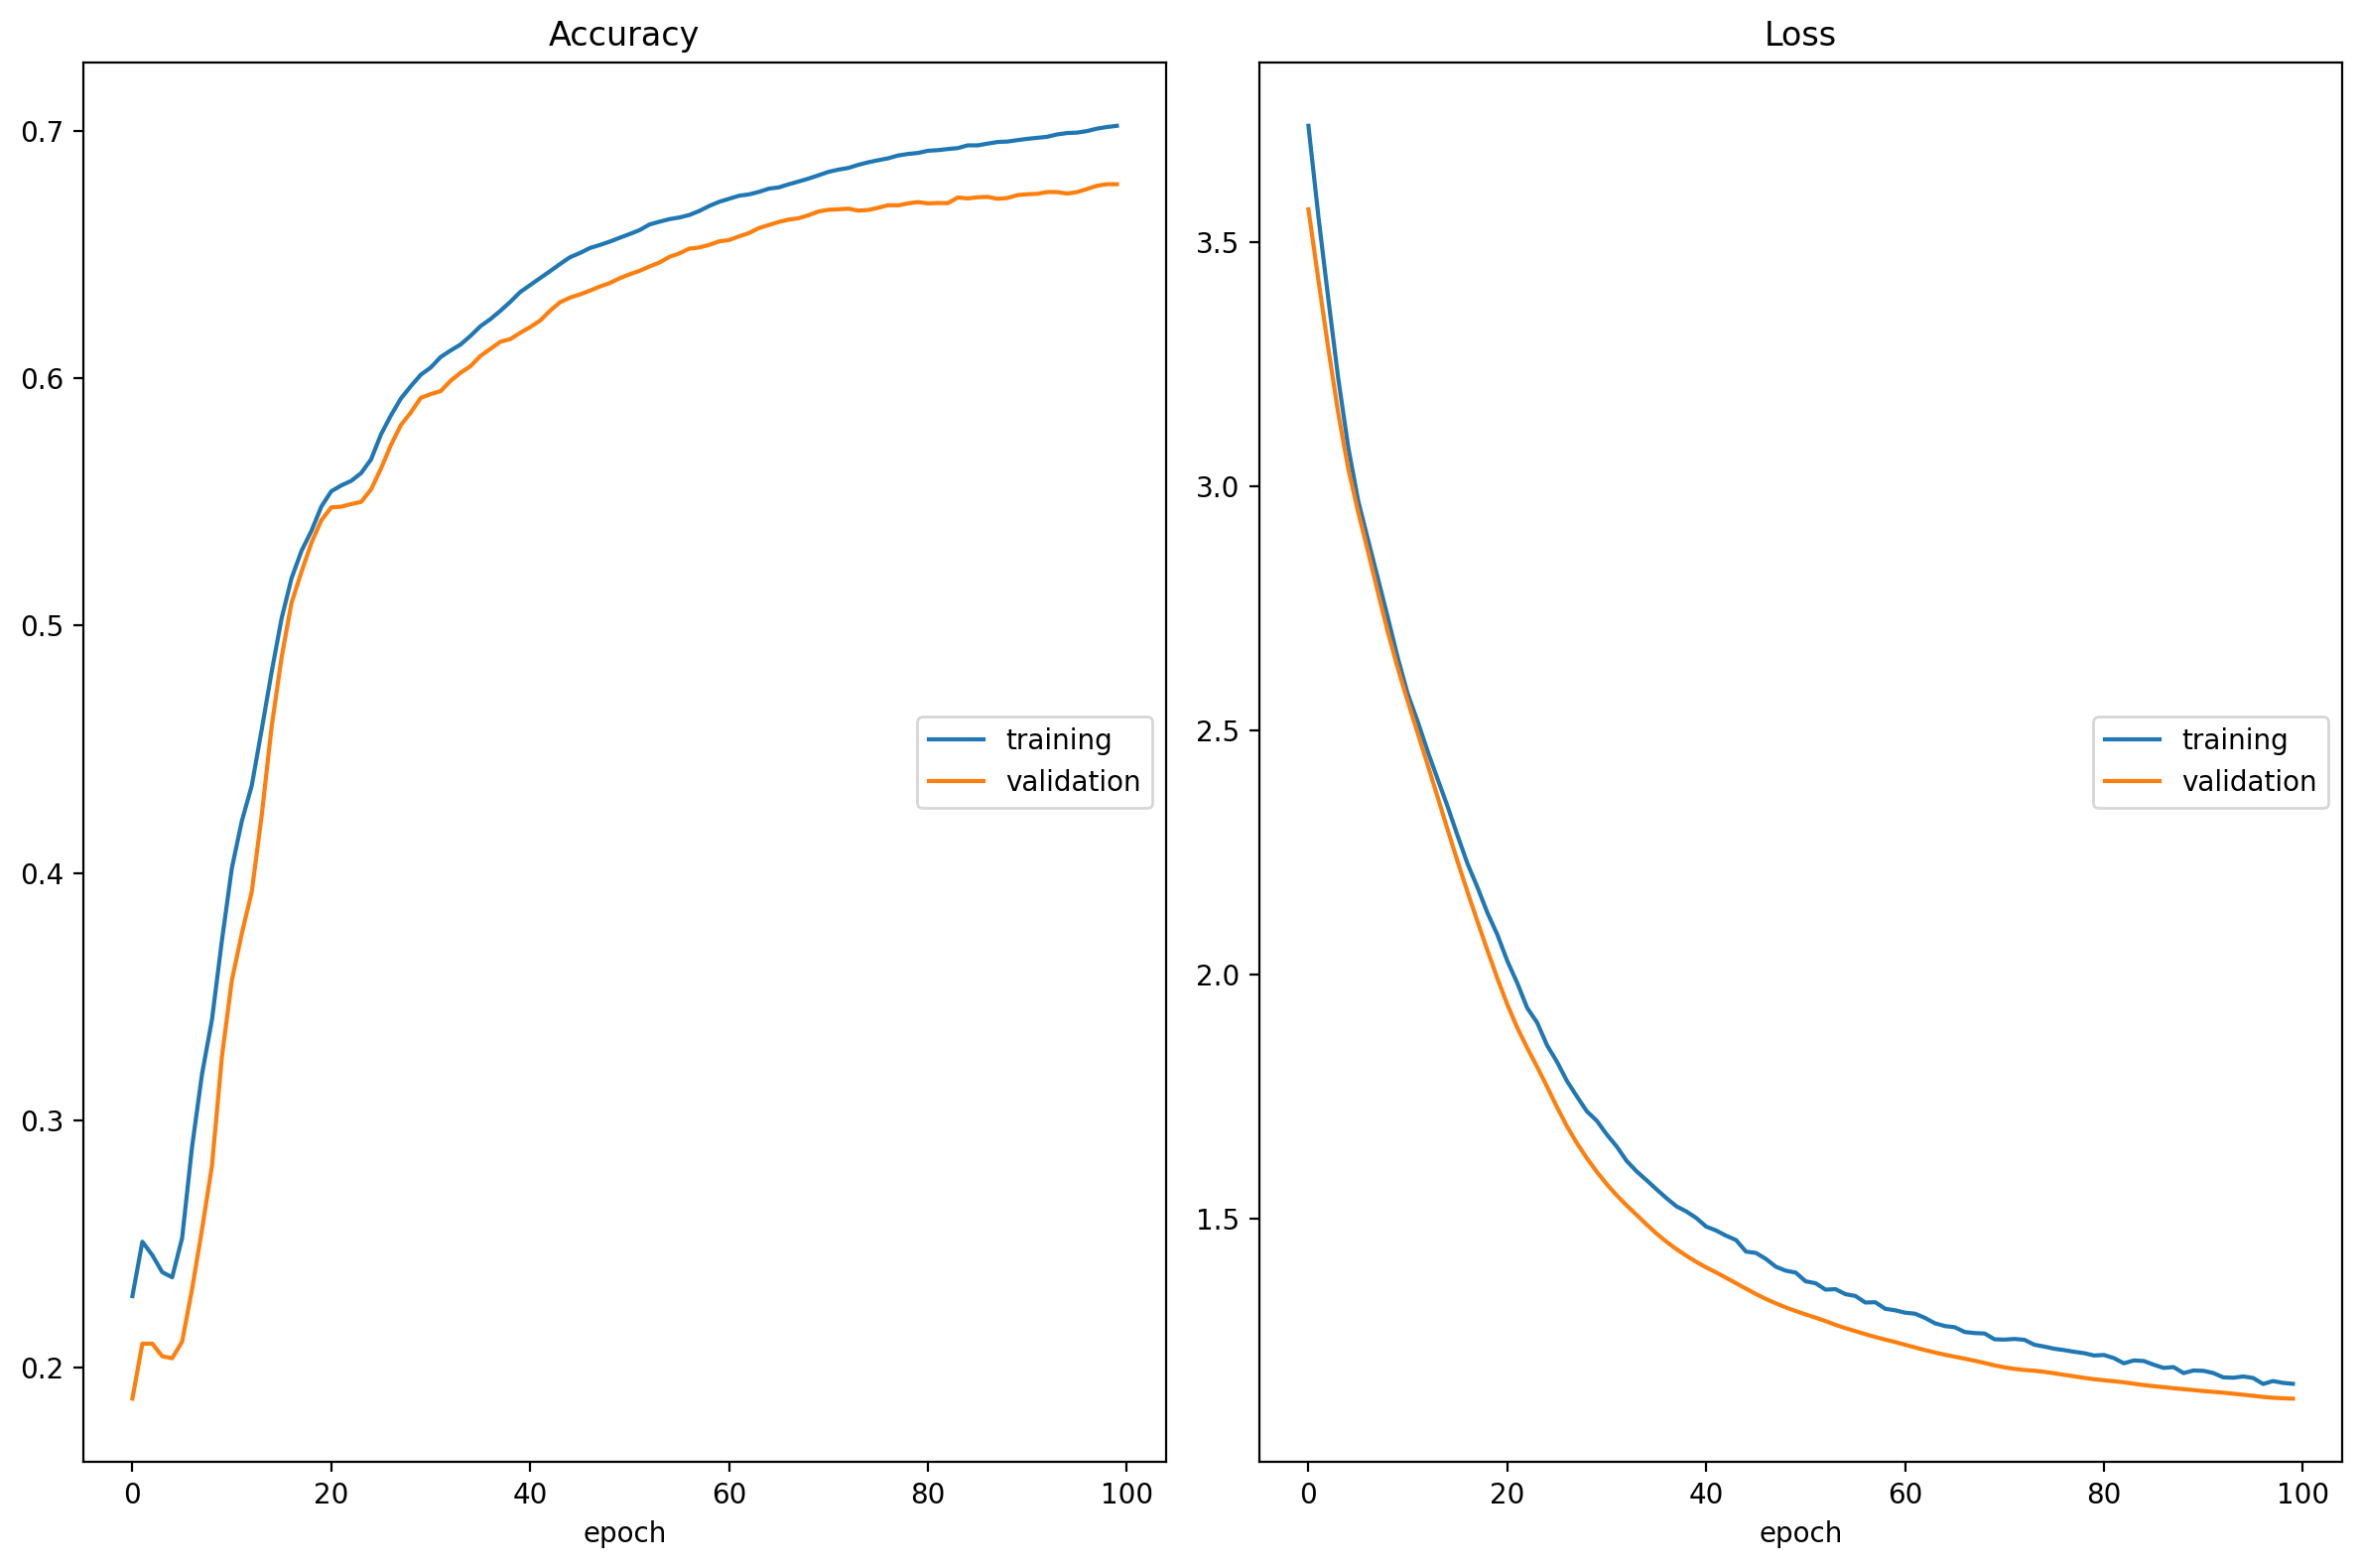

Accuracy
	training         	 (min:    0.229, max:    0.702, cur:    0.702)
	validation       	 (min:    0.187, max:    0.678, cur:    0.678)
Loss
	training         	 (min:    1.162, max:    3.738, cur:    1.162)
	validation       	 (min:    1.132, max:    3.567, cur:    1.132)
time: 1min 38s (started: 2021-03-17 21:41:06 -04:00)


In [8]:
# Define model
hidden_channels = 256
num_layers = 3
dropout = 0.5
epochs = 100
lr = 1e-3

model = model_utils.GCN(ds, hidden_channels, num_layers, dropout)
model = model.cuda()
evaluator = Evaluator(name='ogbn-arxiv')

# Train model, log metrics
train_model(ds, model, evaluator, epochs, lr)

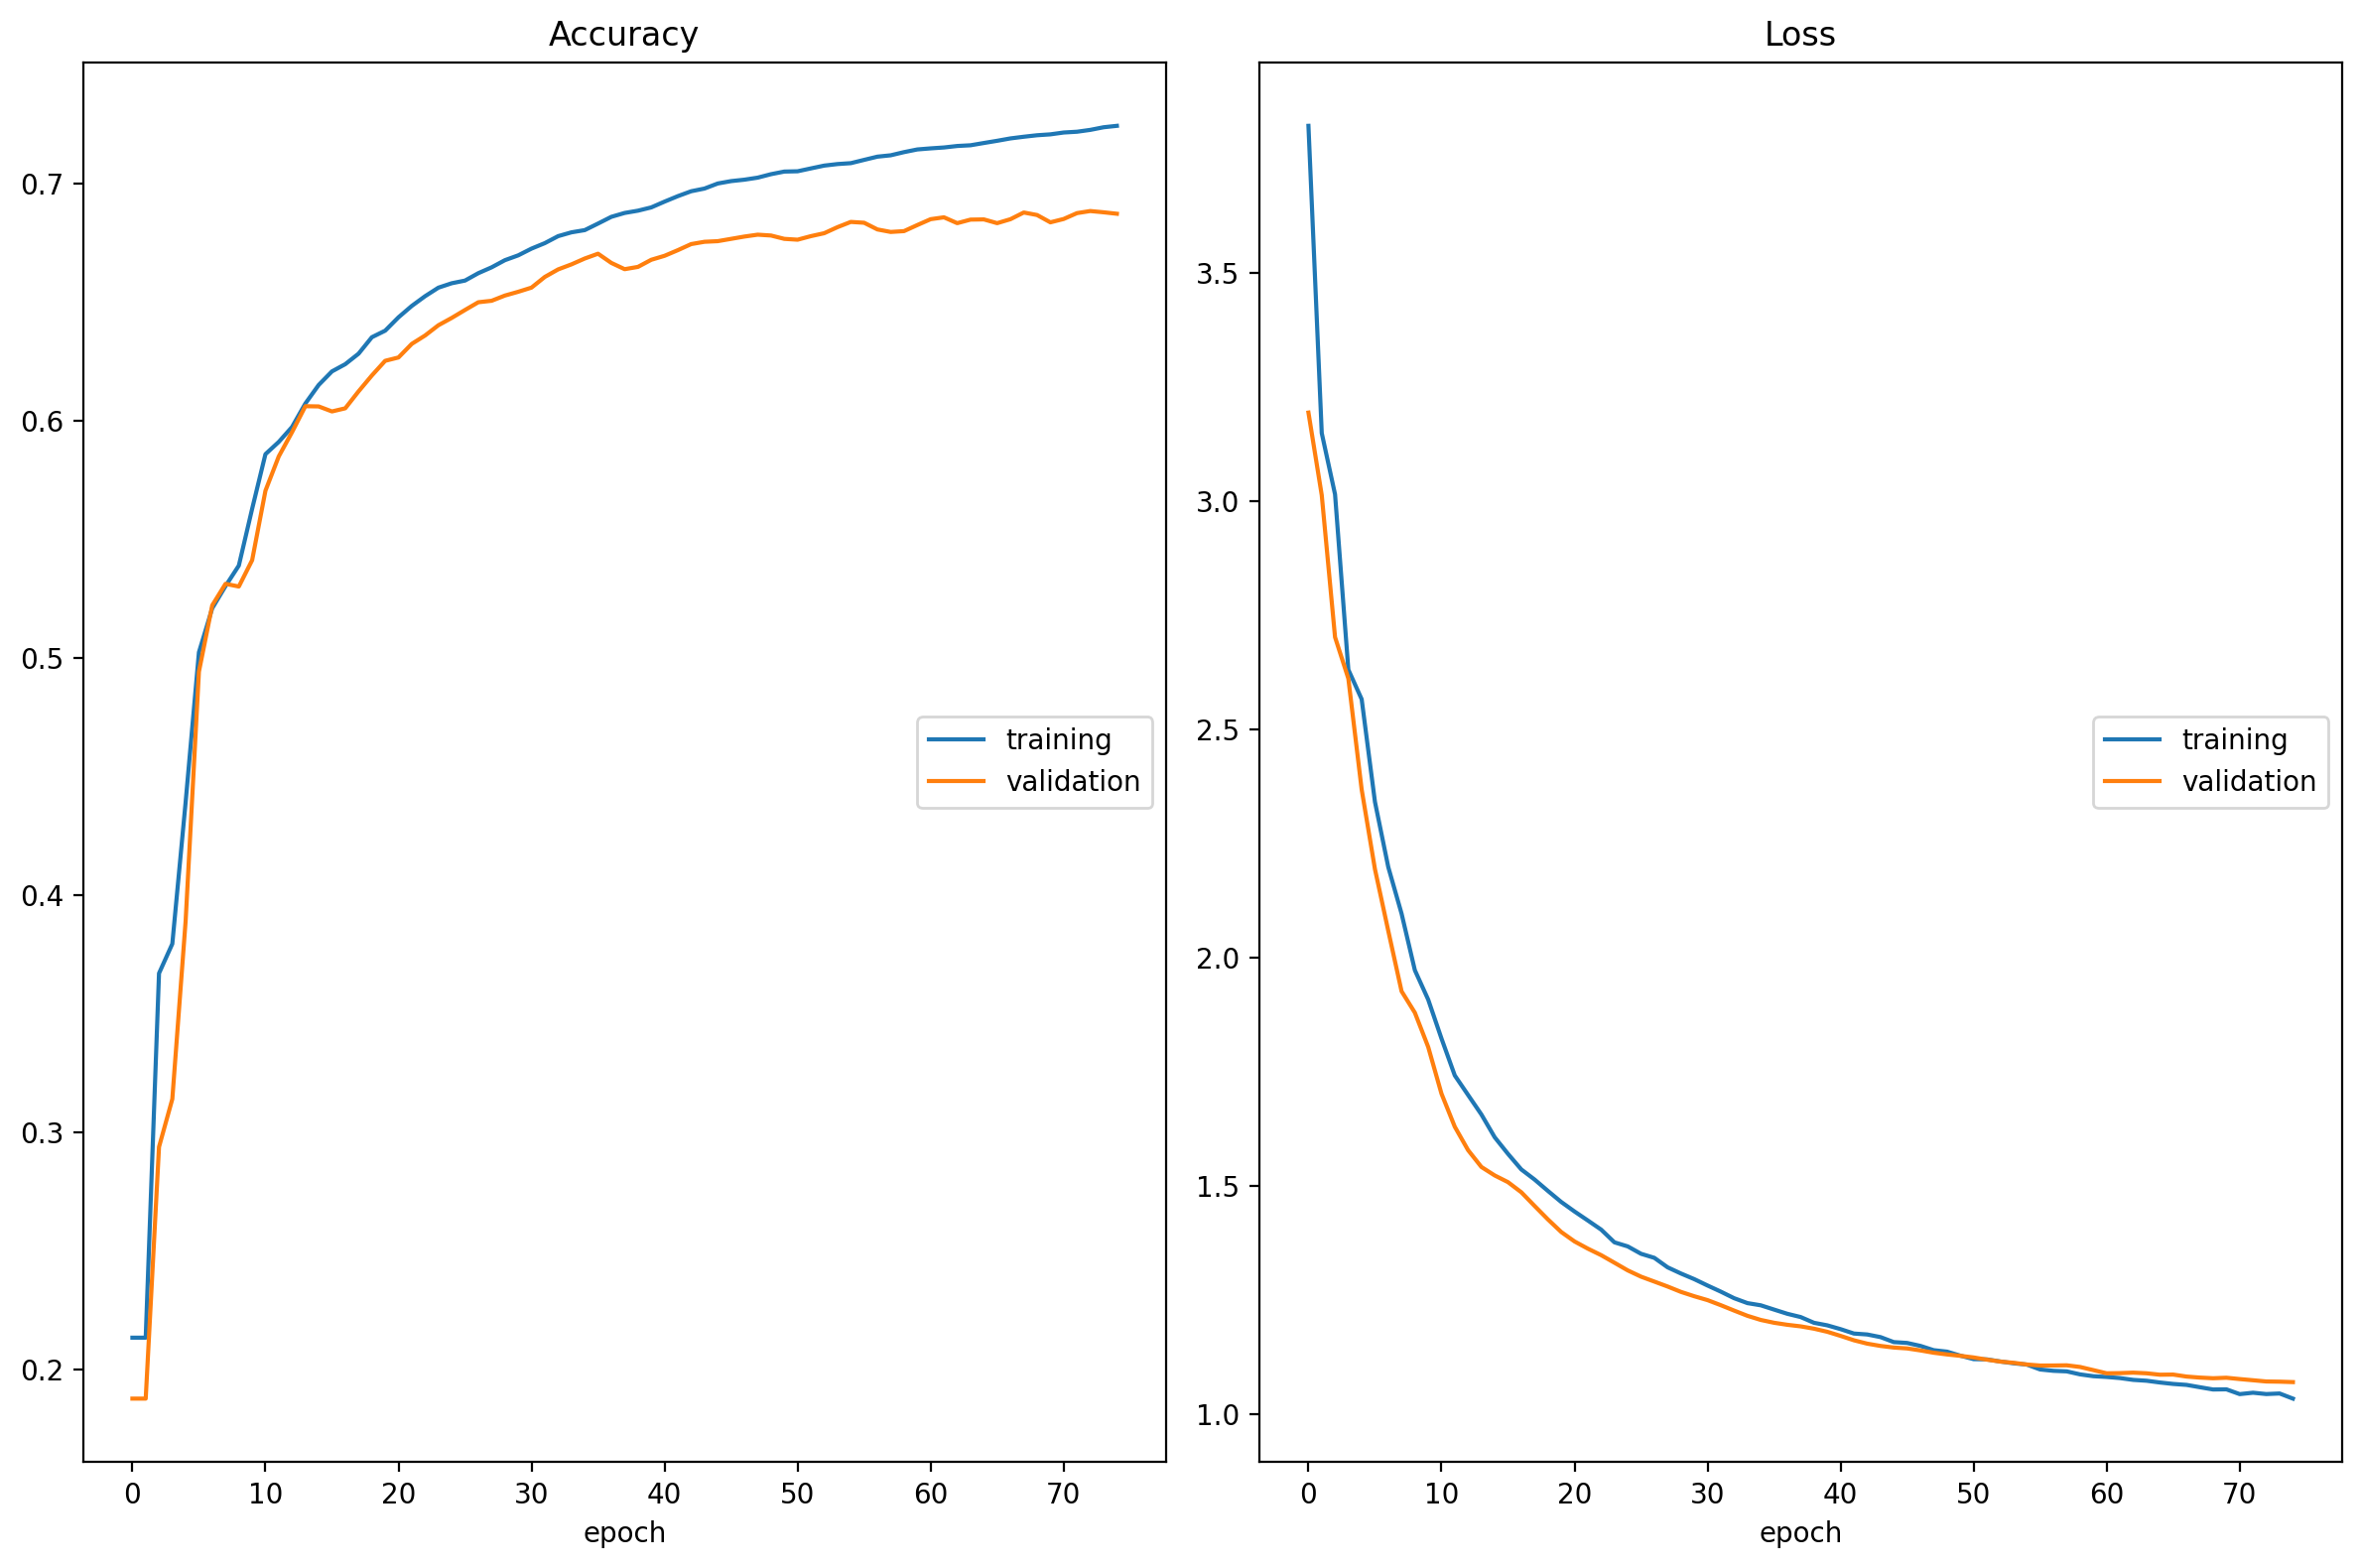

Accuracy
	training         	 (min:    0.213, max:    0.724, cur:    0.724)
	validation       	 (min:    0.188, max:    0.688, cur:    0.687)
Loss
	training         	 (min:    1.035, max:    3.822, cur:    1.035)
	validation       	 (min:    1.071, max:    3.194, cur:    1.071)
time: 1min 11s (started: 2021-03-17 22:58:04 -04:00)


In [12]:
# Define model
hidden_channels = 256
num_layers = 3
dropout = 0.5
epochs = 75
lr = 5e-3

model = model_utils.GCN(ds, hidden_channels, num_layers, dropout)
model = model.cuda()
evaluator = Evaluator(name='ogbn-arxiv')

# Train model, log metrics
train_model(ds, model, evaluator, epochs, lr)

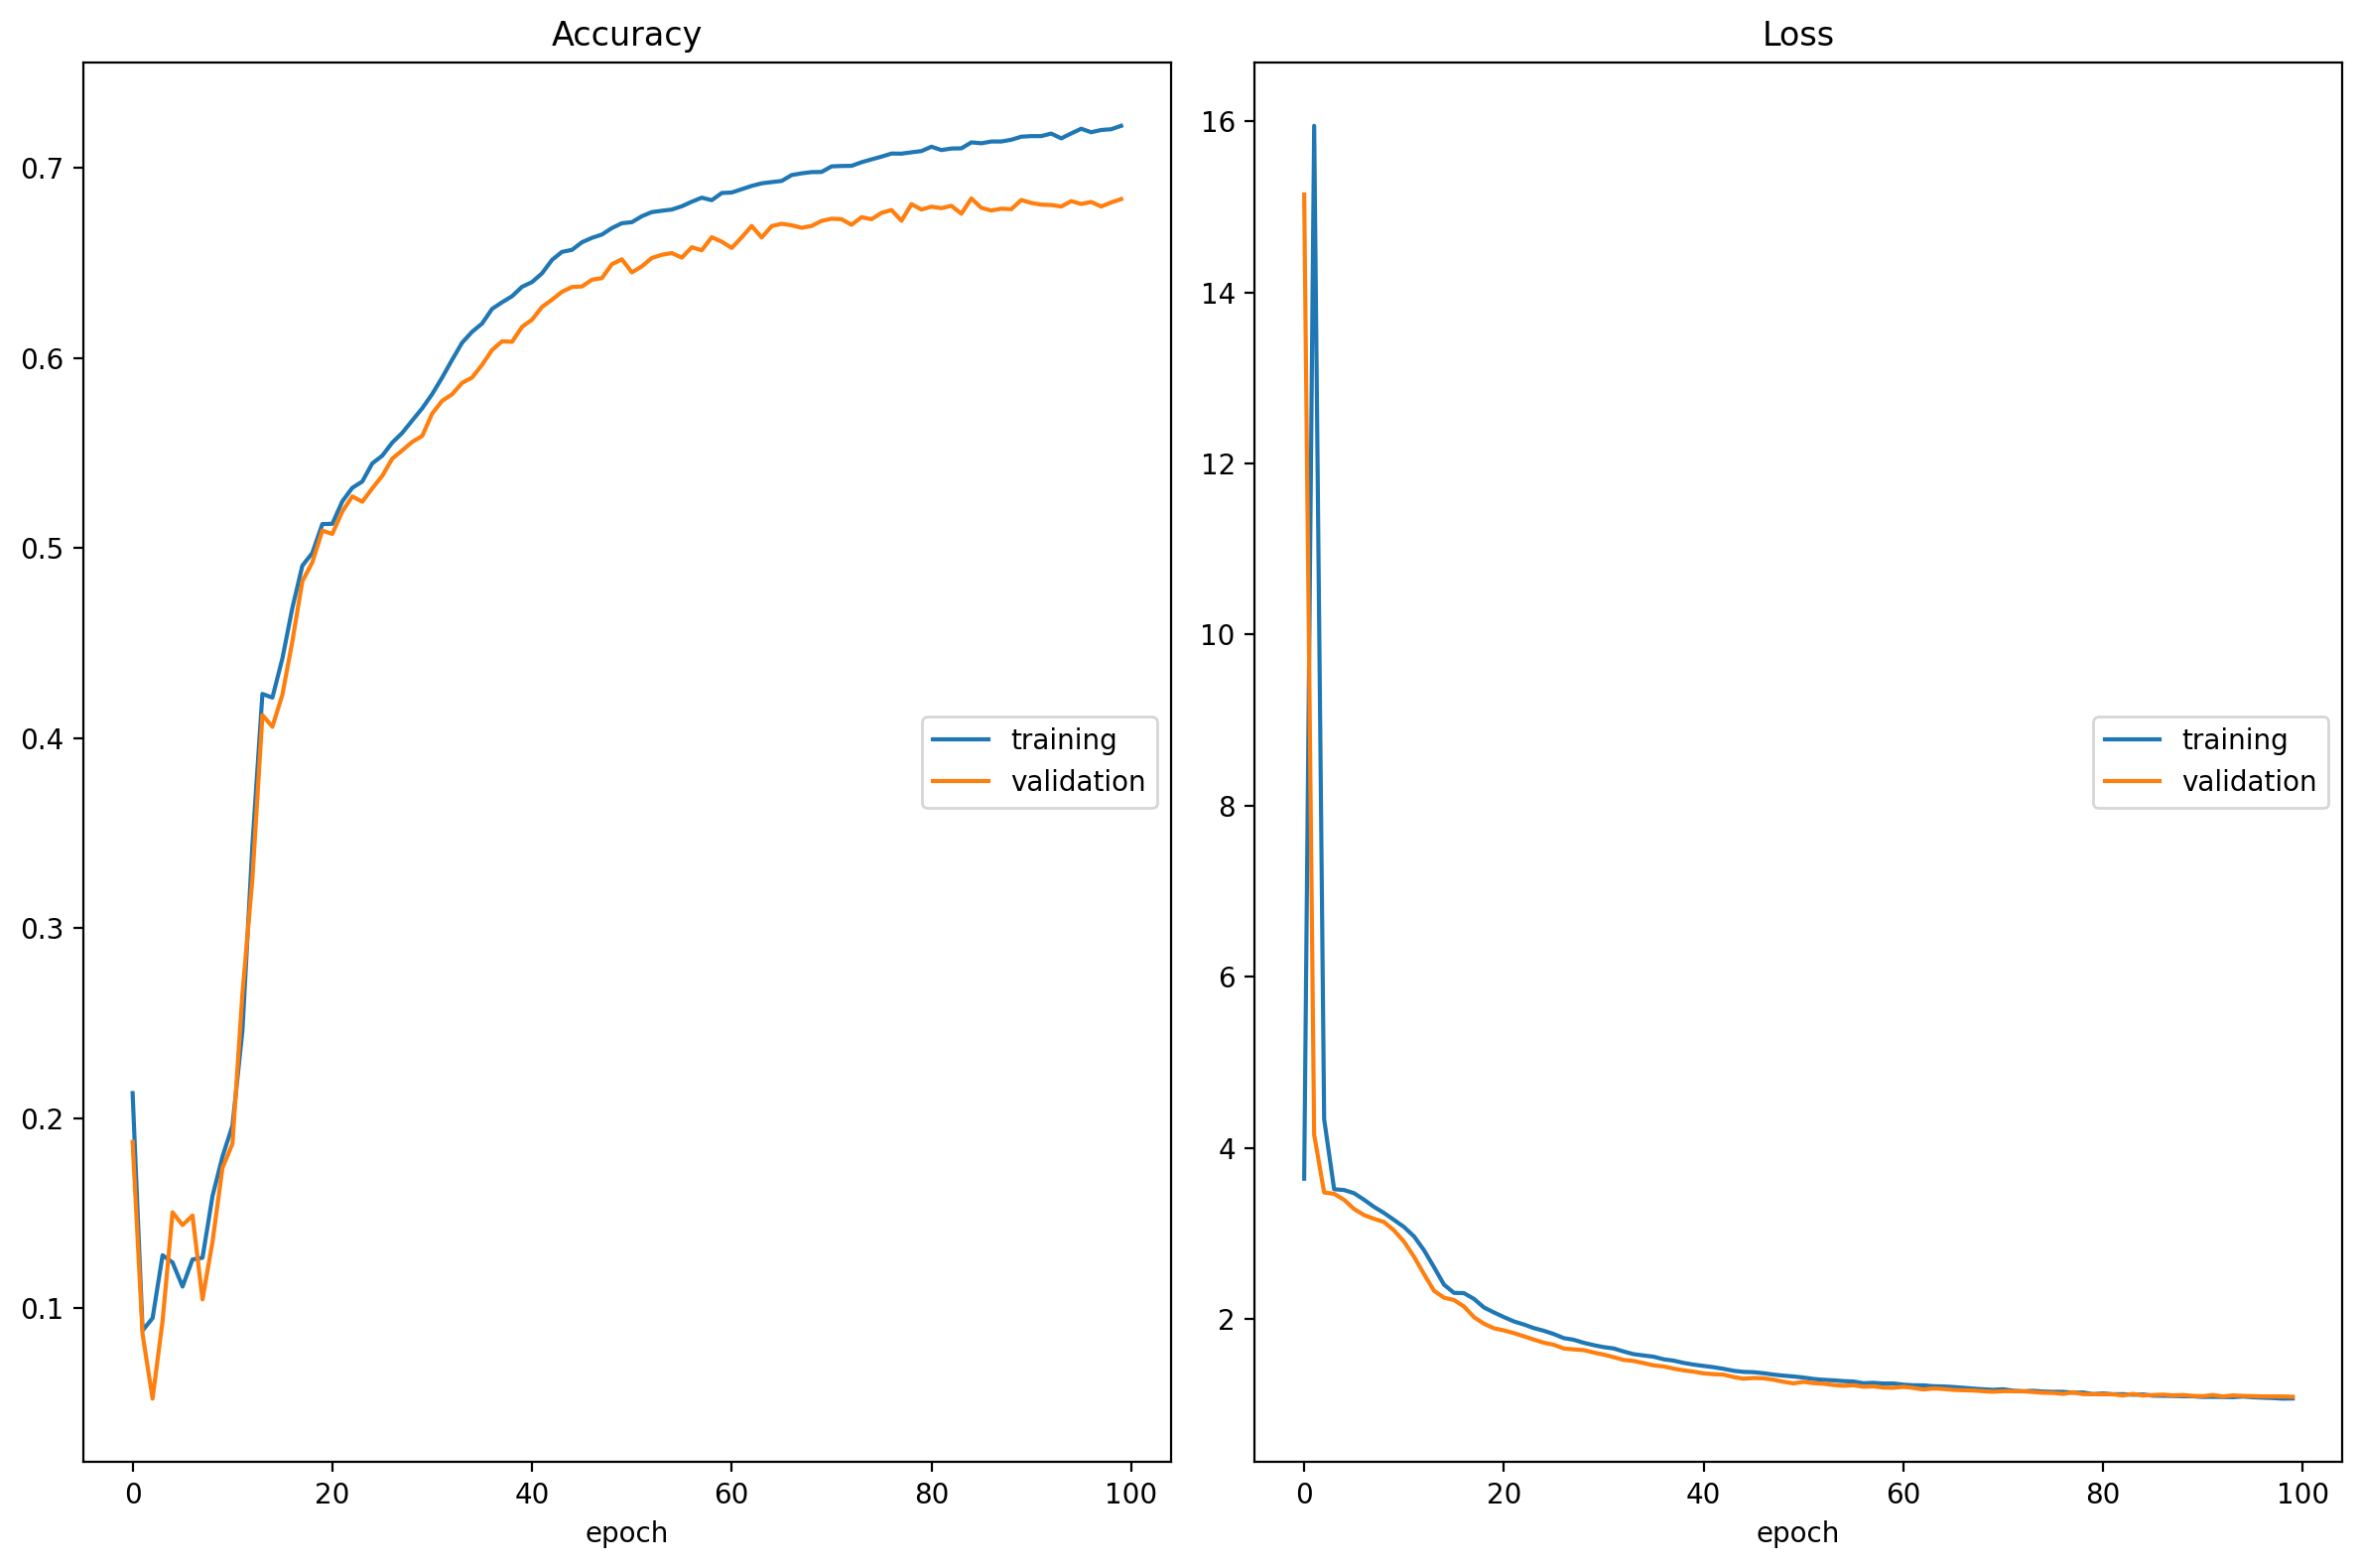

Accuracy
	training         	 (min:    0.088, max:    0.722, cur:    0.722)
	validation       	 (min:    0.052, max:    0.684, cur:    0.684)
Loss
	training         	 (min:    1.072, max:   15.945, cur:    1.074)
	validation       	 (min:    1.094, max:   15.143, cur:    1.094)
time: 1min 36s (started: 2021-03-17 21:48:05 -04:00)


In [11]:
# Define model
hidden_channels = 256
num_layers = 3
dropout = 0.5
epochs = 100
lr = 2e-2

model = model_utils.GCN(ds, hidden_channels, num_layers, dropout)
model = model.cuda()
evaluator = Evaluator(name='ogbn-arxiv')

# Train model, log metrics
train_model(ds, model, evaluator, epochs, lr)

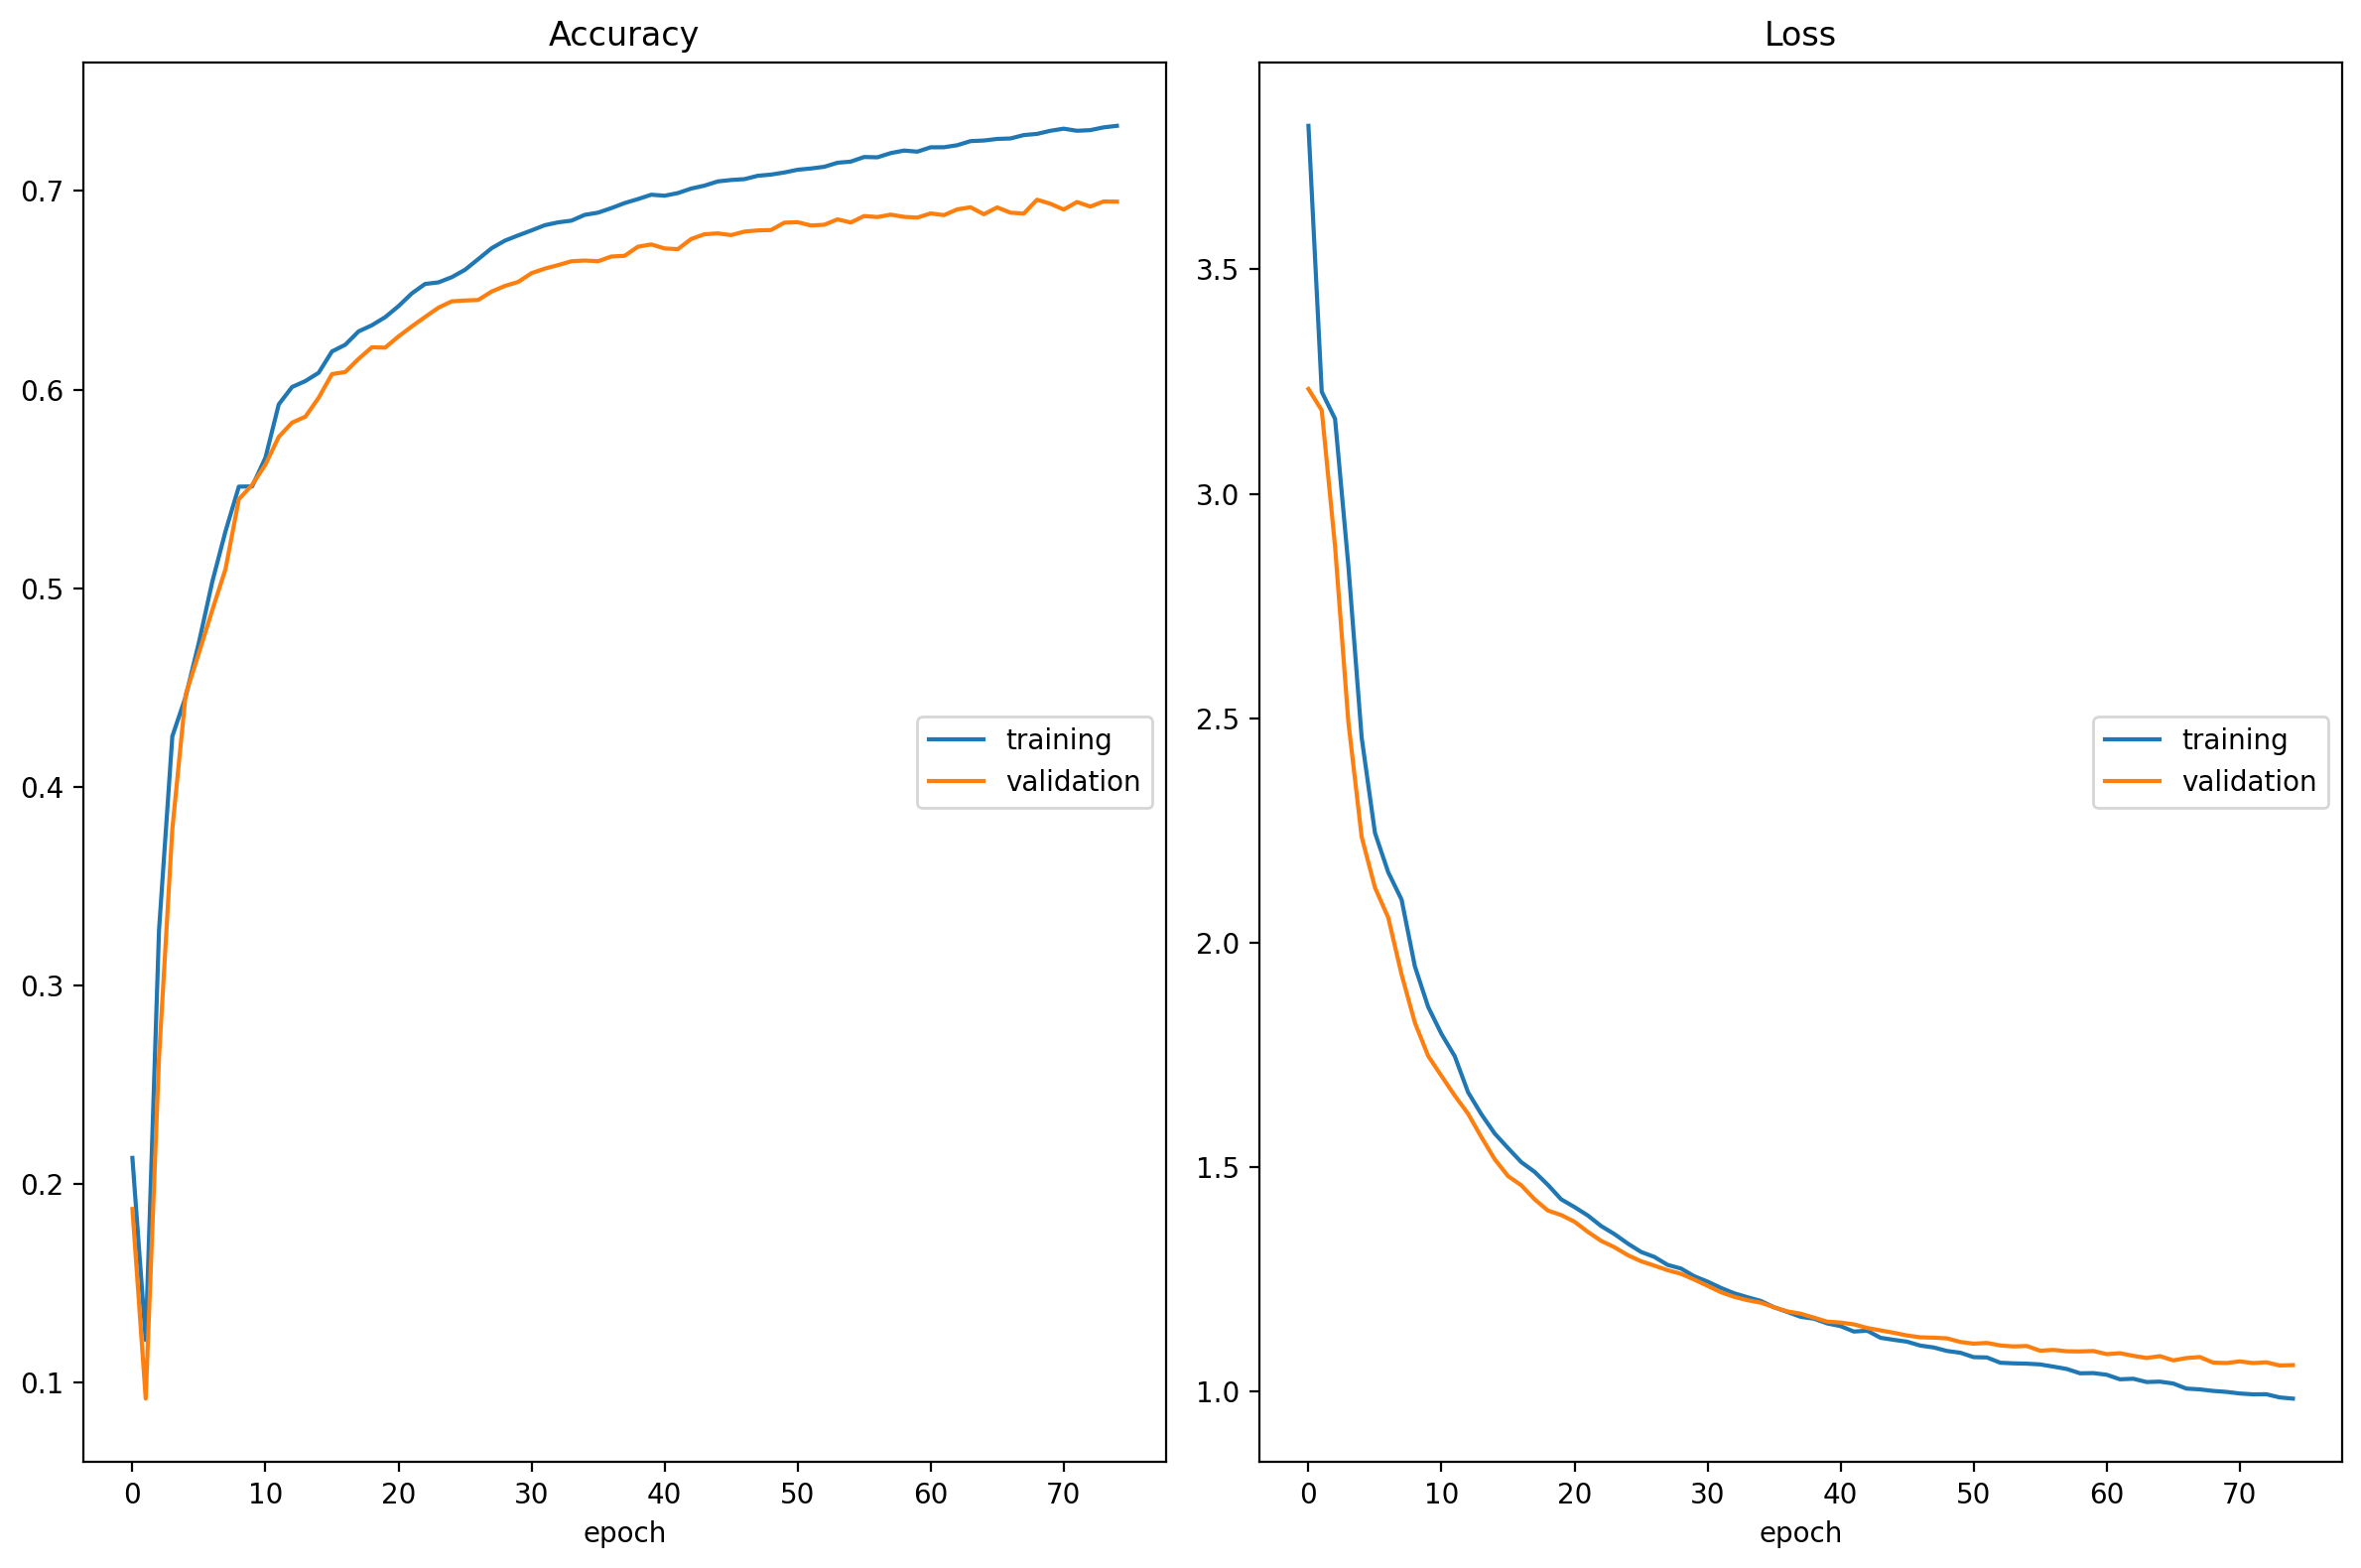

Accuracy
	training         	 (min:    0.122, max:    0.733, cur:    0.733)
	validation       	 (min:    0.092, max:    0.696, cur:    0.695)
Loss
	training         	 (min:    0.984, max:    3.820, cur:    0.984)
	validation       	 (min:    1.058, max:    3.234, cur:    1.059)
time: 1min 11s (started: 2021-03-17 23:09:49 -04:00)


In [16]:
# Define model
hidden_channels = 256
num_layers = 3
dropout = 0.4
epochs = 75
lr = 1e-2

model = model_utils.GCN(ds, hidden_channels, num_layers, dropout)
model = model.cuda()
evaluator = Evaluator(name='ogbn-arxiv')

# Train model, log metrics
train_model(ds, model, evaluator, epochs, lr)